In [1]:
from os import path

import sys
sys.path.append(path.join("..", "notebooks"))
sys.path.append(path.join("..", "notebooks", "utils.py"))
import utils

import anndata
import numpy as np
import pandas as pd
import scipy.sparse as sp
import string

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

# Pancreas

In [2]:
adata = anndata.read_h5ad("baron_embedding_tsne_3000_genes.h5ad")
new = anndata.read_h5ad("baron_transform_tsne_1000_genes.h5ad")

In [3]:
colors = utils.get_colors_for(adata)

In [4]:
knn = KNeighborsClassifier()
knn.fit(adata.obsm["tsne"], adata.obs["labels"].values.astype(str))
accuracy_score(knn.predict(new.obsm["tsne"]), new.obs["labels"].values.astype(str))

0.9946380697050938

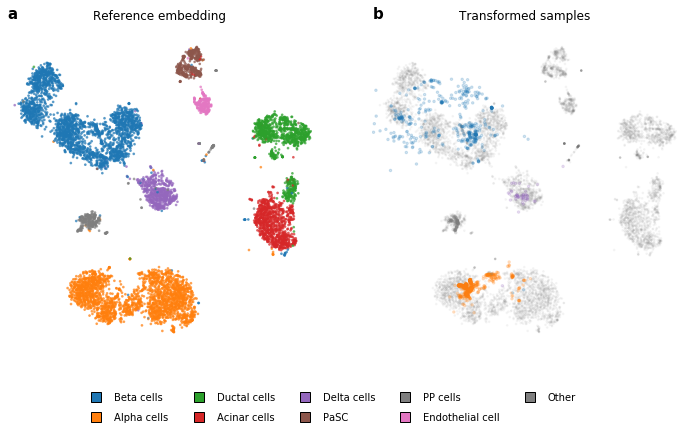

In [5]:
cell_order = list(colors.keys())
num_cell_types = len(np.unique(adata.obs["labels"]))

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

utils.plot(adata.obsm["tsne"], adata.obs["labels"], ax=ax[0], title="Reference embedding", colors=colors, s=3, label_order=cell_order,
          legend_kwargs=dict(loc="upper center", bbox_to_anchor=(0.5, 0.05), bbox_transform=fig.transFigure, labelspacing=1, ncol=num_cell_types // 2 + 1))

colors_bw = {1: "#666666"}
utils.plot(adata.obsm["tsne"], np.ones_like(adata.obs["labels"]), ax=ax[1], colors=colors_bw, alpha=0.05, s=3, draw_legend=False)
utils.plot(new.obsm["tsne"], new.obs["labels"], ax=ax[1], colors=colors, draw_legend=False, s=6, label_order=cell_order, alpha=0.2)
ax[1].set_title("Transformed samples")


for ax_ in ax.ravel(): ax_.axis("equal")
    
coord_range = -38, 38
for ax_ in ax.ravel():
    ax_.set_xlim(*coord_range), ax_.set_ylim(*coord_range)

for ax_, letter in zip(ax, string.ascii_lowercase): 
    plt.text(0, 1.02, letter, transform=ax_.transAxes, fontsize=15, fontweight="bold")

plt.savefig("transform_pancreas.pdf", dpi=600, bbox_inches="tight", transparent=True)

# Brain

In [6]:
adata = anndata.read_h5ad("hrvatin_embedding_tsne_3000_genes.h5ad")
new = anndata.read_h5ad("hrvatin_transform_tsne_1000_genes.h5ad")

In [7]:
knn = KNeighborsClassifier()
knn.fit(adata.obsm["tsne"], adata.obs["labels"].values.astype(str))
accuracy_score(knn.predict(new.obsm["tsne"]), new.obs["labels"].values.astype(str))

0.9608754000206462

In [8]:
colors = utils.get_colors_for(adata)

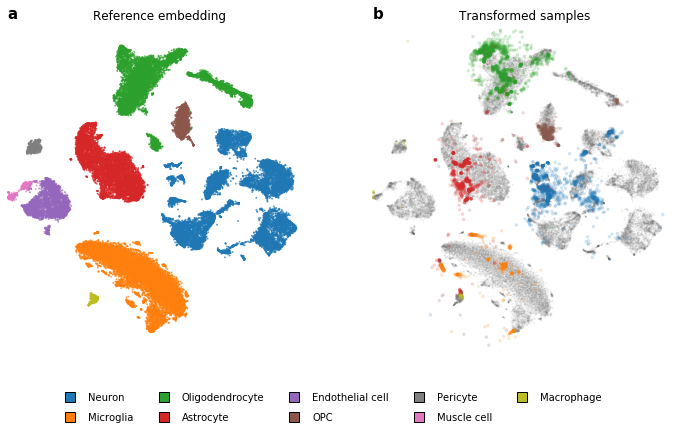

In [9]:
cell_order = list(colors.keys())
num_cell_types = len(np.unique(adata.obs["labels"]))

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

utils.plot(adata.obsm["tsne"], adata.obs["labels"], ax=ax[0], title="Reference embedding", colors=colors, s=1, label_order=cell_order,
          legend_kwargs=dict(loc="upper center", bbox_to_anchor=(0.5, 0.05), bbox_transform=fig.transFigure, labelspacing=1, ncol=num_cell_types // 2 + 1))

colors_bw = {1: "#666666"}
utils.plot(adata.obsm["tsne"], np.ones_like(adata.obs["labels"]), ax=ax[1], colors=colors_bw, alpha=0.05, s=1, draw_legend=False)
utils.plot(new.obsm["tsne"], new.obs["labels"], ax=ax[1], colors=colors, draw_legend=False, s=6, label_order=cell_order, alpha=0.15)
ax[1].set_title("Transformed samples")

for ax_ in ax.ravel(): ax_.axis("equal")

coord_range = -50, 50
for ax_ in ax.ravel():
    ax_.set_xlim(*coord_range), ax_.set_ylim(*coord_range)

for ax_, letter in zip(ax, string.ascii_lowercase): 
    plt.text(0, 1.02, letter, transform=ax_.transAxes, fontsize=15, fontweight="bold")

plt.savefig("transform_brain.pdf", dpi=600, bbox_inches="tight", transparent=True)
plt.savefig("transform_brain.png", dpi=100, bbox_inches="tight", transparent=True)

# Retina

In [10]:
adata = anndata.read_h5ad("macosko_embedding_tsne_3000_genes.h5ad")
new = anndata.read_h5ad("macosko_transform_tsne_1000_genes.h5ad")

In [11]:
knn = KNeighborsClassifier()
knn.fit(adata.obsm["tsne"], adata.obs["labels"].values.astype(str))
accuracy_score(knn.predict(new.obsm["tsne"]), new.obs["labels"].values.astype(str))

0.9869176295191949

In [12]:
colors = utils.MACOSKO_COLORS

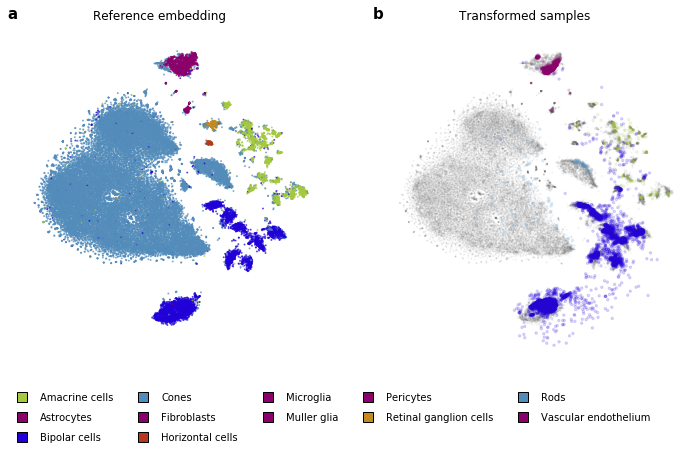

In [13]:
cell_order = list(colors.keys())
num_cell_types = len(np.unique(adata.obs["labels"]))

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

utils.plot(adata.obsm["tsne"], adata.obs["labels"], ax=ax[0], title="Reference embedding", colors=colors, s=1, label_order=cell_order,
          legend_kwargs=dict(loc="upper center", bbox_to_anchor=(0.5, 0.05), bbox_transform=fig.transFigure, labelspacing=1, ncol=num_cell_types // 3 + 1))

colors_bw = {1: "#666666"}
utils.plot(adata.obsm["tsne"], np.ones_like(adata.obs["labels"]), ax=ax[1], colors=colors_bw, alpha=0.05, s=1, draw_legend=False)
utils.plot(new.obsm["tsne"], new.obs["labels"], ax=ax[1], colors=colors, draw_legend=False, s=6, label_order=cell_order, alpha=0.15)
ax[1].set_title("Transformed samples")

for ax_ in ax.ravel(): ax_.axis("equal")

coord_range = -50, 50
for ax_ in ax.ravel():
    ax_.set_xlim(*coord_range), ax_.set_ylim(*coord_range)

for ax_, letter in zip(ax, string.ascii_lowercase): 
    plt.text(0, 1.02, letter, transform=ax_.transAxes, fontsize=15, fontweight="bold")

plt.savefig("transform_retina.pdf", dpi=600, bbox_inches="tight", transparent=True)